In [1]:
import os
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np
import matplotlib.pyplot as plt



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, MaxPooling2D, Flatten, Dense



In [2]:
train_dir = 'data3a/training'
val_dir = 'data3a/validation'

In [3]:
img_width, img_height = 150, 150

In [4]:
epoch = 50
batch_size=32

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
class_names = ["minor","moderate","severe"]

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1383 images belonging to 3 classes.
Found 248 images belonging to 3 classes.


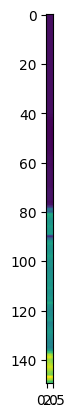

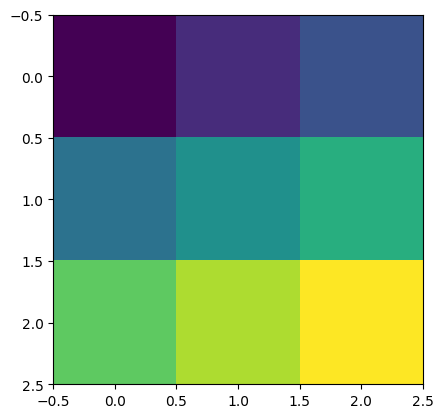

In [8]:
img = load_img('data3a/training/01-minor/0001.JPEG', target_size=(150, 150))

img_array = img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape)

# Generate a batch of augmented images
img_batch = train_datagen.flow(img_array,batch_size=1).next()

# Convert the batch of images to a numpy array
img = np.array(img_batch[0])

# Display the first image in the batch
plt.imshow(img[0])
plt.show()


arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Display the array
plt.imshow(arr)
plt.show()

In [9]:

vgg19_model = Sequential()
pretrained_model = VGG19(
    include_top=False,
    input_shape=(img_width, img_height, 3),
    pooling='max',
    classes=3,
    weights='imagenet'
)
for layer in pretrained_model.layers:
    layer.trainable=False
    
vgg19_model.add(pretrained_model)
vgg19_model.add(Flatten())
vgg19_model.add(Dense(128, activation='relu'))
# minor moderate and severe (3)
vgg19_model.add(Dense(3, activation='softmax'))

80134624/80134624 [==============================] - 15s 0us/step


In [10]:
#Model compile
vgg19_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#Model Train 
history = vgg19_model.fit(train_generator, epochs=epoch, validation_data=val_generator)

Epoch 1/50
44/44 [==============================] - 72s 2s/step - loss: 1.0071 - accuracy: 0.4837 - val_loss: 0.7981 - val_accuracy: 0.6694
Epoch 2/50
44/44 [==============================] - 80s 2s/step - loss: 0.9382 - accuracy: 0.5242 - val_loss: 0.8978 - val_accuracy: 0.5847
Epoch 3/50
44/44 [==============================] - 86s 2s/step - loss: 0.9149 - accuracy: 0.5691 - val_loss: 0.7571 - val_accuracy: 0.6492
Epoch 4/50
44/44 [==============================] - 86s 2s/step - loss: 0.8665 - accuracy: 0.5850 - val_loss: 0.7875 - val_accuracy: 0.6653
Epoch 5/50
44/44 [==============================] - 88s 2s/step - loss: 0.8604 - accuracy: 0.5799 - val_loss: 0.8101 - val_accuracy: 0.6008
Epoch 6/50
44/44 [==============================] - 84s 2s/step - loss: 0.8477 - accuracy: 0.5929 - val_loss: 0.7618 - val_accuracy: 0.6331
Epoch 7/50
44/44 [==============================] - 83s 2s/step - loss: 0.8293 - accuracy: 0.6103 - val_loss: 0.7488 - val_accuracy: 0.6532
Epoch 8/50
44/44 [==

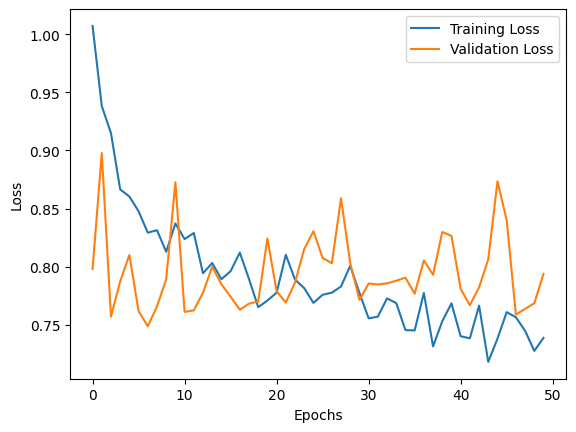

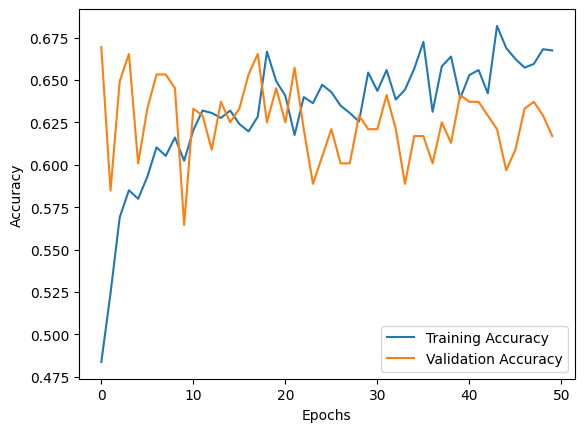

In [12]:
import matplotlib.pyplot as plt
# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
from sklearn.metrics import f1_score
# # f1 score
# plt.plot(history.history['f1_score'], label='Training F1 Score')
# plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
# plt.xlabel('Epochs')
# plt.ylabel('F1 Score')
# plt.legend()
# plt.show()

8/8 [==============================] - 11s 1s/step
Confusion Matrix:


C:\Users\sandi\AppData\Local\Temp\ipykernel_5964\1780940576.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)
C:\Users\sandi\AppData\Local\Temp\ipykernel_5964\1780940576.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])


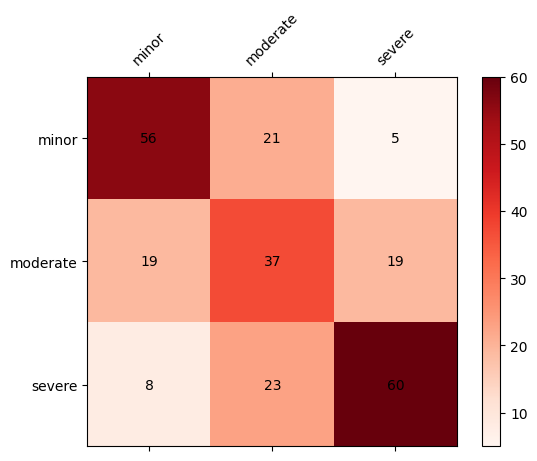

Classification Report:
              precision    recall  f1-score   support

    01-minor       0.67      0.68      0.68        82
 02-moderate       0.46      0.49      0.47        75
   03-severe       0.71      0.66      0.69        91

    accuracy                           0.62       248
   macro avg       0.62      0.61      0.61       248
weighted avg       0.62      0.62      0.62       248



In [13]:
import numpy as np
val_images, val_labels = [], []
class_names = sorted(train_generator.class_indices.keys())
for i in range(len(val_generator)):
    images, labels = val_generator[i]
    val_images.extend(images)
    val_labels.extend(np.argmax(labels, axis=1))


val_images = np.array(val_images)
val_labels = np.array(val_labels)

predictions = vgg19_model.predict(val_images)



from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(predictions, axis=1)
y_true = val_labels

confusion_matrix = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix, cmap='Reds')

cbar = fig.colorbar(cax)

ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)
ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center')
print('Confusion Matrix:')

plt.show()



report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification Report:')
print(report)

In [14]:
#model.save('damage_classification_model-epoch32.keras')

1/1 [==============================] - 0s 36ms/step


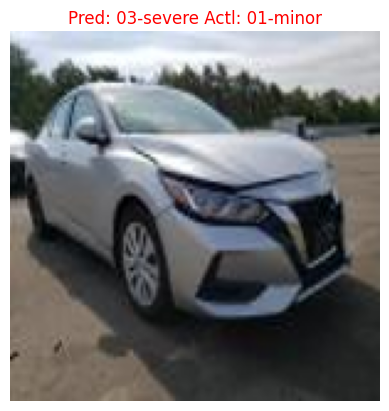

1/1 [==============================] - 0s 37ms/step


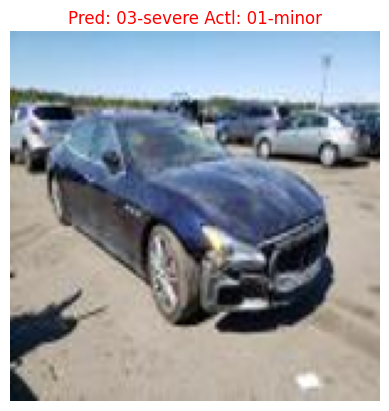

1/1 [==============================] - 0s 56ms/step


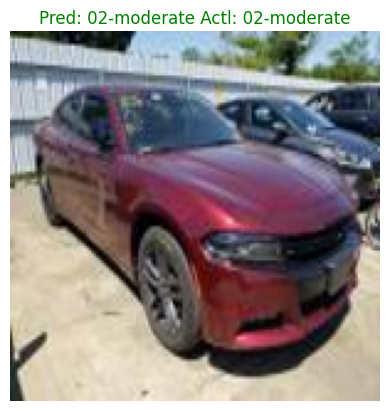

1/1 [==============================] - 0s 38ms/step


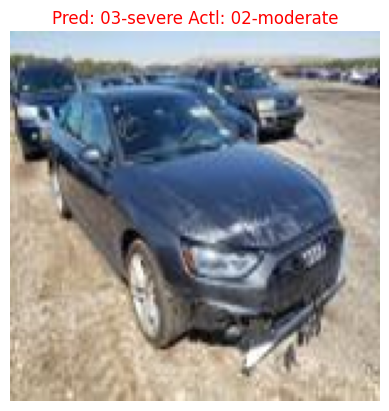

1/1 [==============================] - 0s 45ms/step


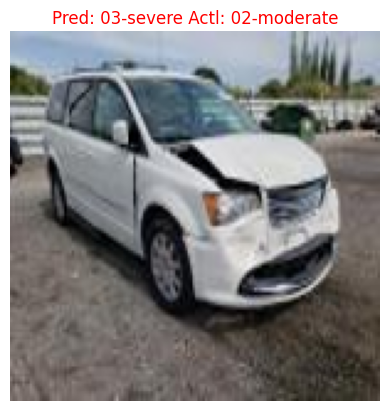

1/1 [==============================] - 0s 36ms/step


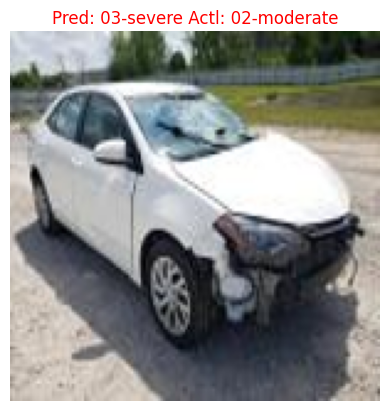

1/1 [==============================] - 0s 28ms/step


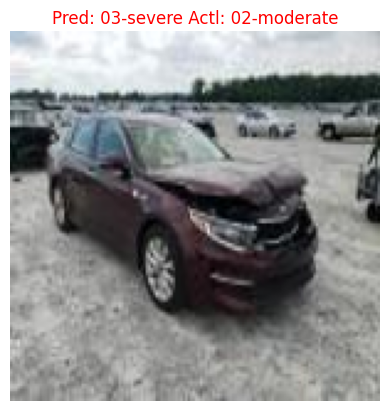

1/1 [==============================] - 0s 35ms/step


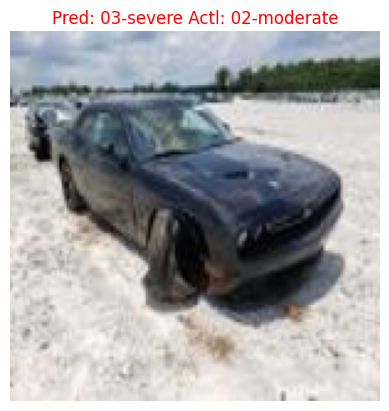

1/1 [==============================] - 0s 36ms/step


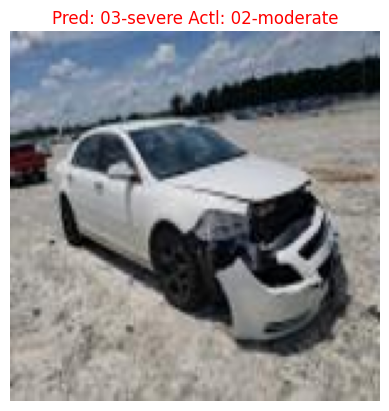

1/1 [==============================] - 0s 35ms/step


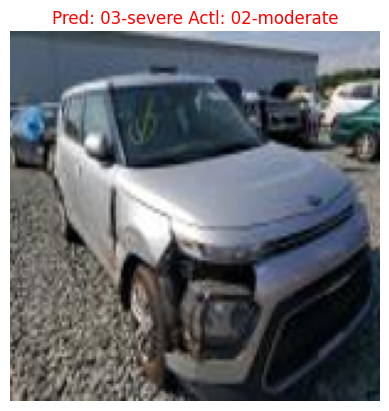

1/1 [==============================] - 0s 41ms/step


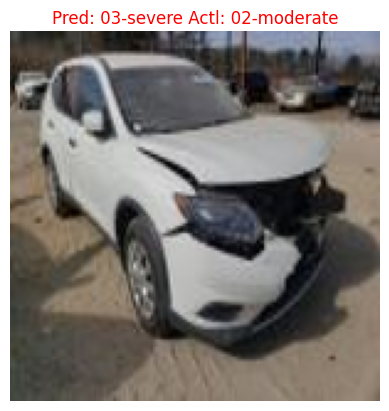

1/1 [==============================] - 0s 38ms/step


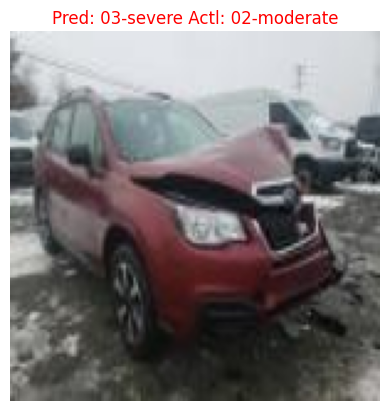

1/1 [==============================] - 0s 36ms/step


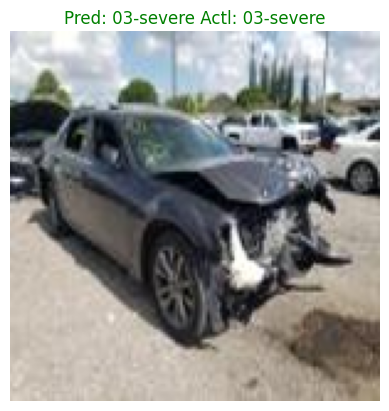

1/1 [==============================] - 0s 36ms/step


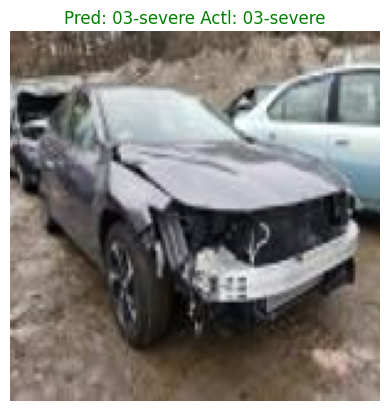

1/1 [==============================] - 0s 36ms/step


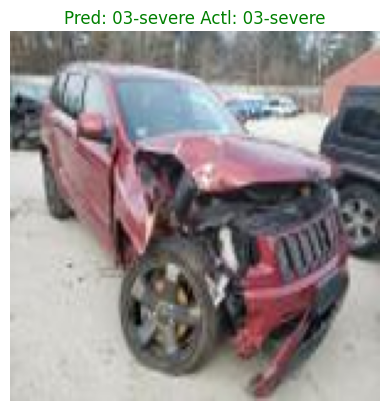

1/1 [==============================] - 0s 33ms/step


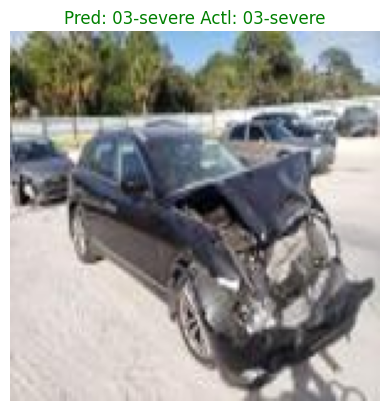

1/1 [==============================] - 0s 36ms/step


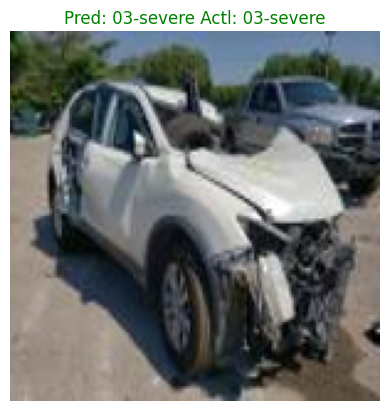

1/1 [==============================] - 0s 31ms/step


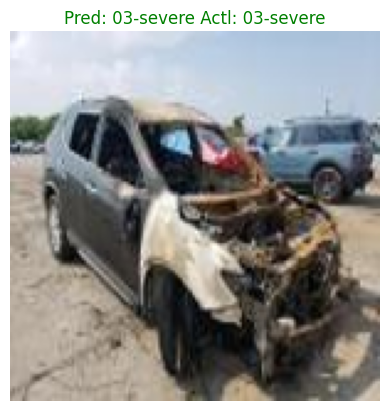

1/1 [==============================] - 0s 40ms/step


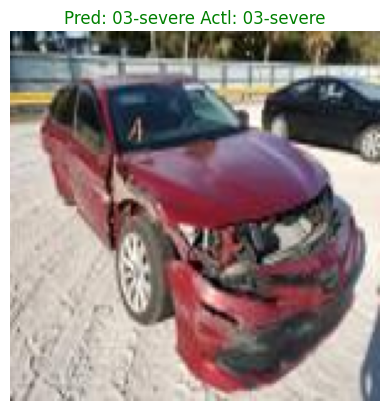

1/1 [==============================] - 0s 40ms/step


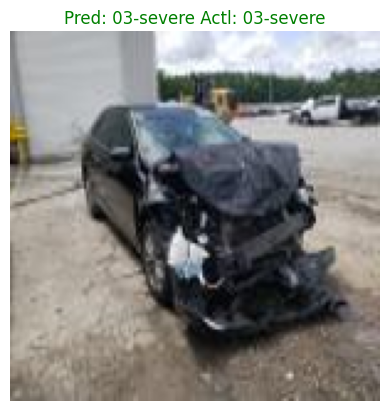

1/1 [==============================] - 0s 36ms/step


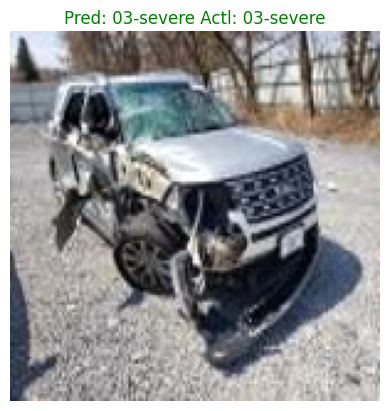

1/1 [==============================] - 0s 38ms/step


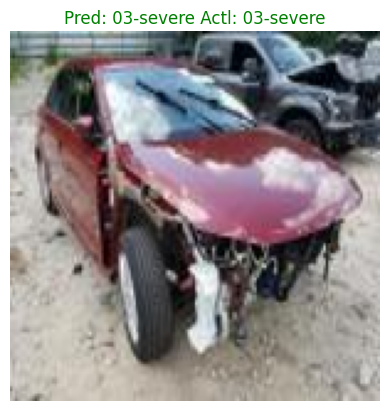

False: 11
True: 11


In [15]:
val_dir = 'data3a/validation'
class_names = ["01-minor", "02-moderate", "03-severe"]

image_paths = []
for class_name in class_names:
    folder_path = os.path.join(val_dir, class_name)
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_paths.append(os.path.join(folder_path, filename))
negative = 0
positive = 0
for image_path in image_paths:
    img = tf.keras.preprocessing.image.load_img(image_path)
    img = img.resize((img_width, img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred_label = class_names[np.argmax(pred)]
    folder_name = os.path.basename(os.path.dirname(image_path))
    plt.imshow(img[0])
    if (pred_label != folder_name):
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'red')
        negative+=1
    else:
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'green')
        positive+=1
   
    plt.axis('off')
    plt.show() 
print('False: '+ str(negative) + '\nTrue: ' + str(positive))